# DISASTER TWEET IDENTIFICATION

In [3]:
!pip install demoji
!pip install numpy

In [4]:
# Data Manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

# NLP libraries
import string # Library for string operations
import nltk 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re # Regex library
import demoji
from wordcloud import WordCloud # Word Cloud library

# ploting libraries
import matplotlib.pyplot as plt

# ML/AI libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB, MultinomialNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout 
from tensorflow.python.keras.initializers import RandomNormal
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

# Loading Data

In [5]:
data = pd.read_csv("train.csv")

# Basic Info
print("Total DataSet: ", len(data))
print("Columns: ", list(data.columns))

X = data[["id", "keyword", "location", "text"]] # Features
y = data[["id","target"]] #Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Data", len(y_train))
print("Testing Data", len(y_test))

data.head(3)

Total DataSet:  7613
Columns:  ['id', 'keyword', 'location', 'text', 'target']
Training Data 6090
Testing Data 1523


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


# Exploratory Data Analysis

## Analyzing Labels

In [6]:
Real_len = data[data['target'] == 1].shape[0]
Not_len = data[data['target'] == 0].shape[0]

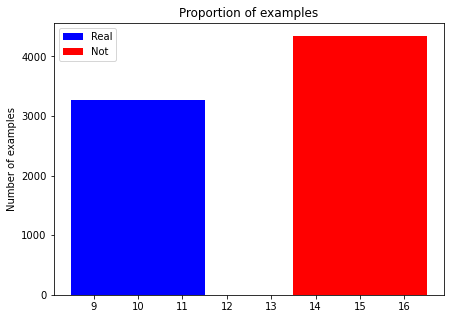

In [7]:
# bar plot of the 3 classes
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,Real_len,3, label="Real", color='blue')
plt.bar(15,Not_len,3, label="Not", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

## Analyzing Features

### Sentence Length Analysis

In [8]:
def length(string):    
    return len(string)
data['length'] = data['text'].apply(length)
data.head

<bound method NDFrame.head of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  length  
0     Our Deeds are the Reason of this #earthquake M...       1      69  
1                Forest fire near La Ronge Sask. Canada       1      38  
2     All residents asked to 'shelter in place' are ...       1     133  
3     13,000 people receive #wildfires evacuation or...       1      65  
4     Just got sent this photo from Ruby #Alaska as ...       1      88  
...                                                 ...     ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1    

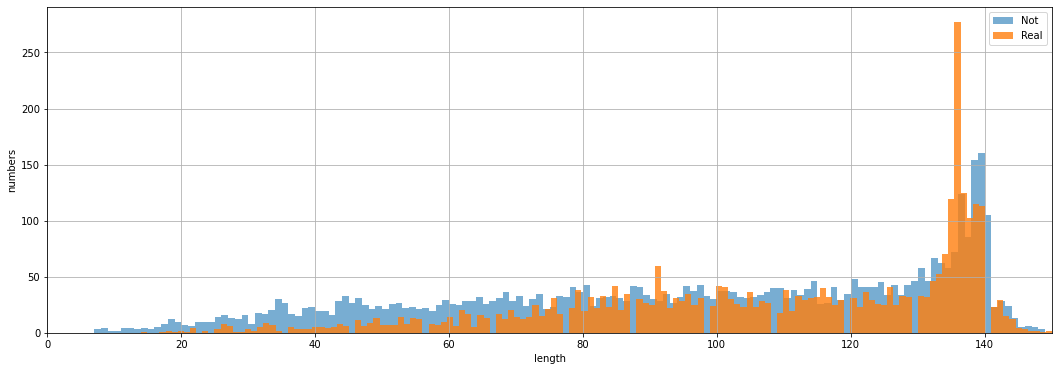

In [9]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(data[data['target'] == 0]['length'], alpha = 0.6, bins=bins, label='Not')
plt.hist(data[data['target'] == 1]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

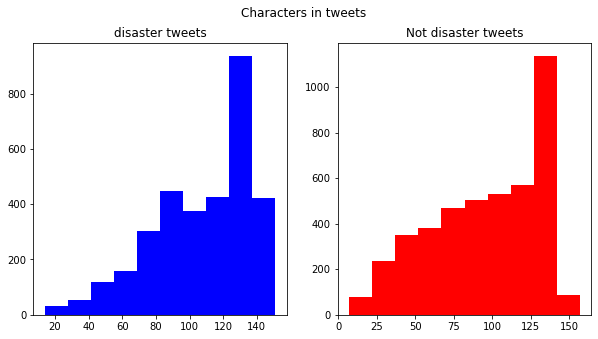

In [10]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data[data['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=data[data['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()

# Data Cleaning

## Done to prepare data for analysis or modification by identifying data that is incorrect, incomplete, duplicate or badly formatted

### Possible text field may contain
### 1. URLs
### 2. Tags
### 3. Emoticons
### 4. HTML Tags
### 5. Stopwords
### 6. Useless Characters

#### 1. Removing URLs

In [11]:
def Remove_Url(string):
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b', '', string)

### 2. Handle Tags

In [13]:
def Handle_Tags(string):
    pattern = re.compile(r'[@|#][^\s]+')
    matches = pattern.findall(string)
    tags = [match[1:] for match in matches]
    # Removing tags from main string
    string = re.sub(pattern, '', string)
    # More weightage to tag by adding them 3 times
    return string + ' ' + ' '.join(tags) + ' '+ ' '.join(tags) + ' ' + ' '.join(tags)

In [14]:
print("Example of text without Handling Tags: \n", X_train['text'][3914],end = "\n\n")
X_train['text'] = X_train['text'].apply(Handle_Tags)
print("Example of text with Handling Tags: \n", X_train['text'][3914])

Example of text without Handling Tags: 
 Spot Flood Combo 53inch 300W Curved Cree LED Work Light Bar 4X4 Offroad Fog Lamp - Full reÛ_ http://t.co/jCDd6SD6Qn http://t.co/9gUCkjghms

Example of text with Handling Tags: 
 Spot Flood Combo 53inch 300W Curved Cree LED Work Light Bar 4X4 Offroad Fog Lamp - Full reÛ_ http://t.co/jCDd6SD6Qn http://t.co/9gUCkjghms   


### 3. Handle Emoticons

In [15]:
def Handle_emoji(string):
    return demoji.replace_with_desc(string)

In [16]:
X_train['text']

6330    VIDEO: Virgin Galactic crash: Brakes blamed: I...
5871    You can only make yourself happy. Fuck those t...
3236     CA  : Registered Nurse - Emergency Department...
2387    25 killed as Kamayani Express Janata Express d...
3399     Bore him with minutiae serve bad champagne. H...
                              ...                        
812     What if every 5000 wins in ranked play gave yo...
198     Why is there an ambulance right outside my wor...
3043     's things she looks in a significant other:\n...
7415    DESCRIPTIONS OF 'WOUNDED CATS BEING 'EXCITING'...
2545    Plot\nIn the futurea totalitarian government e...
Name: text, Length: 6090, dtype: object

In [17]:
print("Example of text without Handled Emojis: \n", X_train['text'],end = "\n\n")
X_train['text'] = X_train['text'].apply(Handle_emoji)
print("Example of text with Handled Emoji: \n", X_train['text'])

Example of text without Handled Emojis: 
 6330    VIDEO: Virgin Galactic crash: Brakes blamed: I...
5871    You can only make yourself happy. Fuck those t...
3236     CA  : Registered Nurse - Emergency Department...
2387    25 killed as Kamayani Express Janata Express d...
3399     Bore him with minutiae serve bad champagne. H...
                              ...                        
812     What if every 5000 wins in ranked play gave yo...
198     Why is there an ambulance right outside my wor...
3043     's things she looks in a significant other:\n...
7415    DESCRIPTIONS OF 'WOUNDED CATS BEING 'EXCITING'...
2545    Plot\nIn the futurea totalitarian government e...
Name: text, Length: 6090, dtype: object

Example of text with Handled Emoji: 
 6330    VIDEO: Virgin Galactic crash: Brakes blamed: I...
5871    You can only make yourself happy. Fuck those t...
3236     CA  : Registered Nurse - Emergency Department...
2387    25 killed as Kamayani Express Janata Express d...
3399     

#### All graphic emoticons have been text converted in the CSV so emoticons are already handled

### 4. Remove HTML Tags

In [18]:
def Remove_html(string):
    return re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(string))

In [19]:
X_train['text'] = X_train['text'].apply(Remove_html)

### 5. Remove Stopwords and Stemming

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
stemmer  = SnowballStemmer('english')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/parthrudakia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parthrudakia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
stopword = stopwords.words('english')
def Remove_StopAndStem(string):
    string_list = string.split()
    return ' '.join([stemmer.stem(i) for i in string_list if i not in stopword])

In [22]:
X_train['text']

6330    VIDEO: Virgin Galactic crash: Brakes blamed: I...
5871    You can only make yourself happy. Fuck those t...
3236     CA  : Registered Nurse - Emergency Department...
2387    25 killed as Kamayani Express Janata Express d...
3399     Bore him with minutiae serve bad champagne. H...
                              ...                        
812     What if every 5000 wins in ranked play gave yo...
198     Why is there an ambulance right outside my wor...
3043     's things she looks in a significant other:\n...
7415    DESCRIPTIONS OF 'WOUNDED CATS BEING 'EXCITING'...
2545    Plot\nIn the futurea totalitarian government e...
Name: text, Length: 6090, dtype: object

In [23]:
print("Example of text before Removing Stopwords: \n", X_train['text'],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_StopAndStem)
print("Example of text after Removing Stopwords and Stemming: \n", X_train['text'])

Example of text before Removing Stopwords: 
 6330    VIDEO: Virgin Galactic crash: Brakes blamed: I...
5871    You can only make yourself happy. Fuck those t...
3236     CA  : Registered Nurse - Emergency Department...
2387    25 killed as Kamayani Express Janata Express d...
3399     Bore him with minutiae serve bad champagne. H...
                              ...                        
812     What if every 5000 wins in ranked play gave yo...
198     Why is there an ambulance right outside my wor...
3043     's things she looks in a significant other:\n...
7415    DESCRIPTIONS OF 'WOUNDED CATS BEING 'EXCITING'...
2545    Plot\nIn the futurea totalitarian government e...
Name: text, Length: 6090, dtype: object

Example of text after Removing Stopwords and Stemming: 
 6330    video: virgin galact crash: brake blamed: inve...
5871        you make happy. fuck tryna ruin keep smile ??
3236    ca : regist nurs - emerg depart ( full time......
2387    25 kill kamayani express janata expre

### 6. Removing Useless Characters

In [24]:
def Remove_UC(string):
    thestring = re.sub(r'[^a-zA-Z\s]','', string)
    # remove word of length less than 2
    thestring = re.sub(r'\b\w{1,2}\b', '', thestring)
    return re.sub(' +', ' ', thestring) 

In [25]:
#print("Example of text before Removing Useless Character: \n", X_train['text'],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_UC)
#print("Example of text after Removing Useless Character: \n", X_train['text'])

In [26]:
def merging_details(data):
        #df = pd.DataFrame(columns=['id', 'Cleaned_data'])
        df_list = []
        
        
        for row in data.itertuples():
            df_dict = {}
            # Processing Keyword and location
            keyword = re.sub(r'[^a-zA-Z\s]','', str(row[2]))
            location = re.sub(r'[^a-zA-Z\s]','', str(row[3]))
            keyword = re.sub(r'\b\w{1,2}\b', '', keyword)
            location = re.sub(r'\b\w{1,2}\b', '', location)
            # Already processed data
            text = str(row[4])

            if keyword == 'nan':
                if location == 'nan':    
                    prs_data = text
                else:
                    prs_data = location + ' ' + text
            else:
                if location == 'nan':    
                    prs_data = keyword + ' ' + text
                else:
                    prs_data = keyword + ' ' + location + ' ' + text                
            
            prs_data = re.sub(' +', ' ', prs_data) 
            
            df_dict['Cleaned_data'] = prs_data
            
            df_list.append(df_dict)
            
                
        return pd.DataFrame(df_list)

In [27]:
X_train = merging_details(X_train)

In [28]:
X_train

,Cleaned_data
0,structuralfailure video virgin galact crash br...
1,ruin you make happy fuck tryna ruin keep smile
2,emergencyservices Los Angeles regist nurs emer...
3,derail Nairobi kill kamayani express janata ex...
4,explode bore minutia serv bad champagne may ex...
...,...
6085,blizzard what everi win rank play gave special...
6086,ambulance whi ambul right outsid work
6087,earthquake box thing look signific other beaut...
6088,wounded descript wound cat excit httptcobjycrgfhi


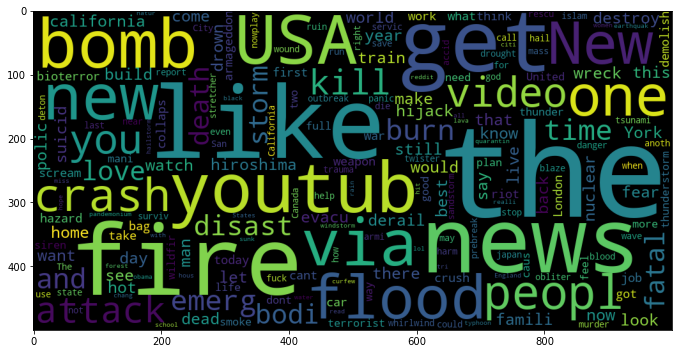

CPU times: user 673 ms, sys: 38.7 ms, total: 712 ms
Wall time: 563 ms


In [29]:
%%time
dict_of_words = {}
for row in  X_train.itertuples():
    for i in row[1].split():
        try:
            dict_of_words[i] += 1
        except:
            dict_of_words[i] = 1

#Initializing  WordCloud
wordcloud = WordCloud(background_color = 'black', width=1000, height=500).generate_from_frequencies(dict_of_words)
fig = plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.tight_layout(pad=1)
plt.show()

# Final Pre-Processing of Data

In [30]:
# Step 1. Remove Url
X_test['text'] = X_test['text'].apply(Remove_Url)
# Step 2. Handle Tags
X_test['text'] = X_test['text'].apply(Handle_Tags)
# Step 3. Handle emoji's
X_test['text'] = X_test['text'].apply(Handle_emoji)
# Step 4. Remove HTML Tags
X_test['text'] = X_test['text'].apply(Remove_html)
# Step 5. Remove Stopwords and Stemming
X_test['text'] = X_test['text'].apply(Remove_StopAndStem)
# Step 6. Removing Useless Characters
X_test['text'] = X_test['text'].apply(Remove_UC)
# Step7. Merging Other Details
X_test = merging_details(X_test)

In [31]:
X_test

,Cleaned_data
0,arson Chicago owner chicagoarea gay bar admit ...
1,collapse Location get feel societi collaps imp...
2,nucleardisaster beforeitsnew former execut pro...
3,eyewitness eyewit travel guide denmark travel ...
4,demolish complet quest demolish murlo game the...
...,...
1518,mayhem beach read august hop give away book ma...
1519,injuries Bay Area forsur back gym tomorrow bod...
1520,hijacker Southern California san jose mercury ...
1521,flames Bacon better sean bro admit sean flame ...


In [32]:
y_train = y_train['target']
y_test = y_test['target']

In [33]:
%%time
#smooth_idf=True by default so smoothing is done by defult.
#norm is l2 by default.
#subliner is used False by default.
vectorizer = TfidfVectorizer(min_df = 0.0005, 
                             max_features = 100000, 
                             tokenizer = lambda x: x.split(),
                             ngram_range = (1,4))


X_train = vectorizer.fit_transform(X_train['Cleaned_data'])
X_test = vectorizer.transform(X_test['Cleaned_data'])

CPU times: user 353 ms, sys: 15.3 ms, total: 368 ms
Wall time: 371 ms


In [34]:
#https://stackoverflow.com/questions/16505670/generating-a-dense-matrix-from-a-sparse-matrix-in-numpy-python
print("Training Points: ", len(X_train.toarray()),"| Training Features:" , len(X_train.toarray()[0]))
print("Testing Points: ", len(X_test.toarray()),"| Testing Features:" , len(X_test.toarray()[0]))
print()
print("Training Points: ", len(y_train))
print("Testing Points: ", len(y_test))

Training Points:  6090 | Training Features: 5495
Testing Points:  1523 | Testing Features: 5495

Training Points:  6090
Testing Points:  1523


# Machine Learning

## Logistic Regression

In [35]:
%%time

Model = LogisticRegression(C=1,penalty='l2')

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.7944845699277742
Macro precision_recall_fscore_support
(0.7963232796871063, 0.784235802659418, 0.7876101660404562, None)
Micro precision_recall_fscore_support
(0.7944845699277742, 0.7944845699277742, 0.7944845699277742, None)
Weighted precision_recall_fscore_support
(0.7953552681424997, 0.7944845699277742, 0.7923519993787886, None)
CPU times: user 71.9 ms, sys: 6.72 ms, total: 78.6 ms
Wall time: 79.1 ms


In [36]:
roc_auc_score(y_test, y_pred)

0.784235802659418

# 

# Naive Bayes

## Gaussian Naive Bayes

In [41]:
%%time
Model = GaussianNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.726854891661195
Macro precision_recall_fscore_support
(0.7709386455720625, 0.6967626000084071, 0.6937106966886598, None)
Micro precision_recall_fscore_support
(0.726854891661195, 0.726854891661195, 0.726854891661195, None)
Weighted precision_recall_fscore_support
(0.7606903928178755, 0.726854891661195, 0.7062141953908737, None)
CPU times: user 164 ms, sys: 149 ms, total: 312 ms
Wall time: 323 ms


In [42]:
roc_auc_score(y_test, y_pred)

0.6967626000084071

# Bernoulli Naive Bayes

In [43]:
%%time
Model = BernoulliNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.7813525935653316
Macro precision_recall_fscore_support
(0.8235285659933286, 0.7561677689192787, 0.760234017657696, None)
Micro precision_recall_fscore_support
(0.7813525935653316, 0.7813525935653316, 0.7813525935653316, None)
Weighted precision_recall_fscore_support
(0.8123799523025713, 0.7813525935653316, 0.769064572627924, None)
CPU times: user 453 ms, sys: 184 ms, total: 638 ms
Wall time: 220 ms


In [44]:
roc_auc_score(y_test, y_pred)

0.7561677689192786

## Complement Naive Bayes

In [45]:
%%time
Model = ComplementNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.8023637557452397
Macro precision_recall_fscore_support
(0.8046660166306956, 0.792238226681052, 0.7957529072785219, None)
Micro precision_recall_fscore_support
(0.8023637557452397, 0.8023637557452397, 0.8023637557452397, None)
Weighted precision_recall_fscore_support
(0.8034539628497731, 0.8023637557452397, 0.800312945089506, None)
CPU times: user 312 ms, sys: 82.9 ms, total: 395 ms
Wall time: 153 ms


In [46]:
roc_auc_score(y_test, y_pred)

0.792238226681052

## Multinomial Naive Bayes

In [47]:
%%time
Model = MultinomialNB()
Model.fit(X_train.toarray(), y_train)
y_pred = Model.predict(X_test.toarray())

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.7997373604727511
Macro precision_recall_fscore_support
(0.8134332113891953, 0.7836122826437248, 0.7888388694857245, None)
Micro precision_recall_fscore_support
(0.7997373604727511, 0.7997373604727511, 0.7997373604727511, None)
Weighted precision_recall_fscore_support
(0.808287056671088, 0.7997373604727511, 0.7947920914410657, None)
CPU times: user 295 ms, sys: 83.5 ms, total: 379 ms
Wall time: 160 ms


# 

# Support Vector Machines (SVM)

### RBF Kernel SVM

In [ ]:
%%time
Model = svm.SVC(kernel='rbf') #rbf by default svm.SVC()
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

In [206]:
roc_auc_score(y_test, y_pred)

0.7795595711641955

## Linear SVC

In [207]:
%%time
Model = svm.SVC(kernel='linear') 
Model.fit(X_train, y_train)
y_pred = Model.predict(X_test)

print("Acuracy", accuracy_score(y_test, y_pred))
print("Macro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))
print("Micro precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
print("Weighted precision_recall_fscore_support")
print(precision_recall_fscore_support(y_test, y_pred, average='weighted'))

Acuracy 0.7931713722915299
Macro precision_recall_fscore_support
(0.792540221099532, 0.7781645075975127, 0.7827215278447698, None)
Micro precision_recall_fscore_support
(0.7931713722915299, 0.7931713722915299, 0.7931713722915299, None)
Weighted precision_recall_fscore_support
(0.7929201226563461, 0.7931713722915299, 0.7905745546595505, None)
CPU times: user 4.08 s, sys: 33.9 ms, total: 4.11 s
Wall time: 8.03 s


## Random Forest Classifier

In [208]:
data_full=pd.read_csv('train.csv')
data = data_full
data = data_full.drop_duplicates('text', keep='last')
print(len(data))


7503


In [209]:
data = data_full.drop_duplicates('text', keep='last')
print(len(data))
df=data

7503


In [210]:
data = data.drop(['target'],axis=1)

In [211]:
data['text'] = data['text'].apply(Remove_Url)
data['text'] = data['text'].apply(Handle_Tags)
data['text'] = data['text'].apply(Handle_emoji)
data['text'] = data['text'].apply(Remove_html)
data['text'] = data['text'].apply(Remove_UC)

In [212]:
nltk.download('punkt')
nltk.download('stopwords')
stemmer  = SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:

data['text'] = data['text'].apply(Remove_StopAndStem)

In [214]:
data = merging_details(data)

In [215]:
db=pd.read_csv('train.csv')
db=db.drop_duplicates('text', keep='last')
data['target']=db['target']

In [216]:
x_train, x_test, y_train, y_test = train_test_split(
    data['Cleaned_data'],
    db['target'],
    test_size=0.3,
    random_state=1)

In [217]:
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer(use_idf=False) # just use tf, no idf used

# convert the text list to tfidf form matrix
x_train_counts = count_vect.fit_transform(x_train)
x_train_tf = tf_transformer.fit_transform(x_train_counts)
y_train = np.array(y_train)

clf = MultinomialNB()
clf.fit(x_train_tf, y_train) # train the classifier

# convert list to matrix
x_pre_counts = count_vect.transform(x_test)
x_pre_tf = tf_transformer.transform(x_pre_counts)

predicted = clf.predict(x_pre_tf)

In [218]:
metrics.accuracy_score(list(y_test), predicted)

0.8080852954242559

In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [220]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(x_train_tf, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,34.298388,3.750542,0.327218,0.019081,None,300,"{'max_depth': None, 'n_estimators': 300}",0.800190,0.774500,0.785714,0.766667,0.778095,0.781033,0.011372,1
10,18.451669,0.408880,0.168006,0.001254,None,150,"{'max_depth': None, 'n_estimators': 150}",0.803045,0.767840,0.782857,0.769524,0.778095,0.780272,0.012650,2
7,8.761800,0.265019,0.080284,0.001870,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.791627,0.753568,0.796190,0.758095,0.767619,0.773420,0.017393,3
8,17.143827,0.197834,0.163938,0.003813,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.791627,0.753568,0.786667,0.760000,0.768571,0.772087,0.014804,4
9,1.193227,0.026988,0.013409,0.002328,None,10,"{'max_depth': None, 'n_estimators': 10}",0.784967,0.745956,0.763810,0.751429,0.760000,0.761232,0.013424,5


In [221]:
clf = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=0)
clf.fit(x_train_tf, y_train)
predicted = clf.predict(x_pre_tf)
metrics.accuracy_score(list(y_test), predicted)

0.7823189693469569

In [222]:
train_ab=pd.read_csv('train.csv')
train_ab = train_ab.drop_duplicates('text', keep='last')

In [223]:
train_ab['text'] = train_ab['text'].apply(Remove_Url)
train_ab['text'] = train_ab['text'].apply(Handle_Tags)
train_ab['text'] = train_ab['text'].apply(Handle_emoji)
train_ab['text'] = train_ab['text'].apply(Remove_html)
train_ab['text'] = train_ab['text'].apply(Remove_UC)
train_ab['text'] = train_ab['text'].apply(Remove_StopAndStem)

In [224]:
train_ab = merging_details(train_ab)

In [225]:
test_ab=pd.read_csv('test.csv')

In [226]:
test_ab['text'] = test_ab['text'].apply(Remove_Url)
test_ab['text'] = test_ab['text'].apply(Handle_Tags)
test_ab['text'] = test_ab['text'].apply(Handle_emoji)
test_ab['text'] = test_ab['text'].apply(Remove_html)
test_ab['text'] = test_ab['text'].apply(Remove_UC)
test_ab['text'] = test_ab['text'].apply(Remove_StopAndStem)

In [227]:
test_ab = merging_details(test_ab)

In [228]:
test_ab.head()

,Cleaned_data
0,just happen terribl car crash
1,heard differ citi stay safe everyon earthquak ...
2,forest fire spot pond gees flee across street ...
3,apocalyps light spokan wildfir spokan wildfir ...
4,typhoon soudelor kill china taiwan


In [229]:
count_vect = CountVectorizer()
tf_transformer = TfidfTransformer(use_idf=False) # just use tf, no idf used

# convert the text list to tfidf form matrix
x_train_counts = count_vect.fit_transform(train_ab['Cleaned_data'])
x_train_tf = tf_transformer.fit_transform(x_train_counts)
y_train = np.array(db['target'])

clf = MultinomialNB()
clf.fit(x_train_tf, y_train) # train the classifier

# convert list to matrix
x_pre_counts = count_vect.transform(test_ab['Cleaned_data'])
x_pre_tf = tf_transformer.transform(x_pre_counts)

predicted = clf.predict(x_pre_tf)

In [230]:
clf = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=0)
clf.fit(x_train_tf, y_train)
predicted = clf.predict(x_pre_tf)
#metrics.accuracy_score(list(y_test), predicted)

In [231]:
final=pd.DataFrame(predicted)

In [232]:
final.to_csv('RandomForestClassifier.csv')

# BERT MODEL

In [235]:
original_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [236]:
display(original_data.head())
display(original_data.info(show_counts=True))

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


None

# Dataset Pre-processing

In [237]:
# %20 is the URL encoding of space, let's replace them with '_'
def re_encode_space(input_string):
    return None if pd.isna(input_string) else input_string.replace('%20', '_')


# Let's try to find hastags
import re

def find_hash_tags(input_string):
    hash_tags = re.findall(r"#(\w+)", str(input_string))
    return ','.join(hash_tags)


# Let's turn hashtags to normal words
def re_encode_hashtags(input_string):
    return None if pd.isna(input_string) else input_string.replace('#', '')


# Let's remove URLs from the tweets
def remove_links(input_string):
    res = input_string
    urls = re.findall(r'(https?://[^\s]+)', res)
    for link in urls:
        res = res.strip(link)
    return res


# Let's remove the state abbreviations
def state_renaming(input_string):

    states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District_of_Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North_Carolina',
        'ND': 'North_Dakota',
        'NE': 'Nebraska',
        'NH': 'New_Hampshire',
        'NJ': 'New_Jersey',
        'NM': 'New_Mexico',
        'NV': 'Nevada',
        'NY': 'New_York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode_Island',
        'SC': 'South_Carolina',
        'SD': 'South_Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West_Virginia',
        'WY': 'Wyoming'
    }

    result = input_string
    
    if isinstance(input_string, str):
        input_candidates = input_string.split(', ')
        
        if len(input_candidates) > 1:
            for candidate in input_candidates:
                if candidate in states.keys():
                    result = states[candidate]
                
    if input_string in states.keys():
        result = states[input_string]

    return result

# Applying pre-processing to the data

In [238]:
def preprocess_data(input_data):
    input_df = input_data.copy()
    input_df['keyword'] = input_df['keyword'].map(re_encode_space)
    input_df['keyword'].fillna('Missing', inplace=True)
    input_df['hashtags'] = input_df['text'].map(find_hash_tags)
    input_df['text'] = input_df['text'].map(re_encode_hashtags)
    input_df['text'] = input_df['text'].map(remove_links)
    input_df['location'] = input_df['location'].map(state_renaming)
    return input_df

In [239]:
original_data = preprocess_data(original_data)
test_data = preprocess_data(test_data)

In [240]:
def na_proportions(data, column_name, as_pct):
    if column_name in data.columns:
        na_counts = len(data[pd.isna(data[column_name])])
        non_na_counts = len(data[~pd.isna(data[column_name])])
    else:
        na_counts = None
        non_na_counts = None
        
    if as_pct:
        na_counts /= data.shape[0]
        non_na_counts /= data.shape[0]
    return (column_name, na_counts, non_na_counts)

In [241]:
keyword_props = na_proportions(data=original_data, column_name='keyword', as_pct=True)
print(f'The {keyword_props[0]} variable has: NA={keyword_props[1]:.3f} NON-NA={keyword_props[2]:.3f}')
location_props = na_proportions(data=original_data, column_name='location', as_pct=True)
print(f'The {location_props[0]} variable has: NA={location_props[1]:.3f} NON-NA={location_props[2]:.3f}')

The keyword variable has: NA=0.000 NON-NA=1.000
The location variable has: NA=0.333 NON-NA=0.667


In [242]:
X = original_data['text'].tolist()
y = np.asarray(original_data['target'].tolist()).astype(np.float32)

test_array = test_data['text'].tolist()

# The tokenizer is used to turn a string of words into a list of tokens (words) for which we'll get their vector representation (embeddings)

In [250]:
!pip install transformers

     |████████████████████████████████| 4.0 MB 8.9 MB/s 
     |████████████████████████████████| 596 kB 48.1 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 6.6 MB 47.8 MB/s 
     |████████████████████████████████| 880 kB 45.2 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=37a255cee6dd5592cebff083dbeb2c2b121fa3fa26fce3b4960bc2f460e25b35
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [251]:
from nltk.tokenize import TweetTokenizer
from transformers import AutoTokenizer,TFBertModel

In [245]:
tknzr = TweetTokenizer(
    preserve_case=False,
    reduce_len=True,
    strip_handles=True,
)


def tokenize_tweets(tokenizer, input_text):
    tokens = list(tokenizer.tokenize(input_text))
    tokens = [re.sub('[^A-Za-z0-9]+', '', i) for i in tokens]
    return tokens

original_data['tokens'] = original_data['text']
original_data['tokens'] = original_data['tokens'].apply(lambda x: tokenize_tweets(tknzr, x))

test_data['tokens'] = test_data['text'].apply(lambda x: tokenize_tweets(tknzr, x))

We'll pad all embeddings to match the length of the biggest tweet in order to account for the variability in tweet length Later on the model is going to mask the padded values, so that they won't influence the result

In [246]:

max_tweet_length = max(original_data['tokens'].apply(lambda x: len(x)).max(), 
                       test_data['tokens'].apply(lambda x: len(x)).max())

In [252]:
bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

X = bert_tokenizer(
    text=X,
    add_special_tokens=True,
    max_length=max_tweet_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

test_array = bert_tokenizer(
    text=test_array,
    add_special_tokens=True,
    max_length=max_tweet_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)




Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [256]:
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import LearningRateSchedule

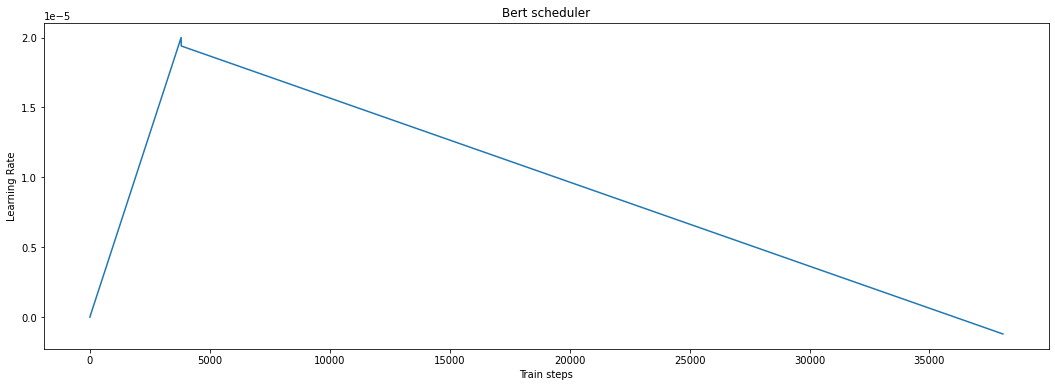

In [257]:
epochs = 5
steps_per_epoch = X['input_ids'].numpy().shape[0]
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

class BertLrSchedule(LearningRateSchedule):

    @tf.function
    def __init__(self, initial_learning_rate, num_warmups, num_train_steps):
        self.overshoot = 1000
        self.initial_learning_rate = initial_learning_rate
        self.num_warmups = num_warmups
        self.num_train_steps = num_train_steps
        self.angle_warm = self.initial_learning_rate / self.num_warmups
        self.angle_decay = - self.initial_learning_rate / \
            (self.num_train_steps - self.num_warmups - self.overshoot)
    
    @tf.function
    def __call__(self, step):
        if step <= self.num_warmups:
            return (tf.cast(step, tf.float32) + 1) * self.angle_warm
        else:
            return self.initial_learning_rate + (tf.cast(step, tf.float32) - self.num_warmups + 1 + self.overshoot) * self.angle_decay
        
        
schedule = BertLrSchedule(initial_learning_rate=2e-5, 
                          num_warmups=num_warmup_steps, 
                          num_train_steps=num_train_steps)

steps = np.arange(num_train_steps)
lrs = [schedule.__call__(i) for i in steps]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(steps, lrs)
ax.set_xlabel('Train steps')
ax.set_ylabel('Learning Rate')
ax.set_title('Bert scheduler')
plt.show()

In [263]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential, Input, optimizers

In [264]:
def build_bert_classifier():
    input_ids = Input(shape=(max_tweet_length,), dtype=tf.int32, name="input_ids")
    input_mask = Input(shape=(max_tweet_length,), dtype=tf.int32, name="attention_mask")
    embeddings = bert(input_ids,attention_mask = input_mask)['pooler_output']
    net = tf.keras.layers.Dropout(0.1)(embeddings)
    net = tf.keras.layers.Dense(128, activation='relu', name='pre-clf')(net)
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(inputs=[input_ids, input_mask], outputs=net)

skf = StratifiedKFold(n_splits=5)
train_average_score = 0
validation_average_score = 0
validation_oof_predictions = np.zeros((len(X['input_ids'].numpy())))

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = Adam(learning_rate=schedule)
epochs = 5

averaged_test_predictions = np.zeros((test_array['input_ids'].shape[0]))


for fold_n, (train_idx, test_idx) in enumerate(skf.split(X['input_ids'].numpy(), y)):
    X_train_ids = X['input_ids'].numpy()[train_idx]
    X_train_att = X['attention_mask'].numpy()[train_idx]
    y_train = y[train_idx]
    
    X_test_ids = X['input_ids'].numpy()[test_idx]
    X_test_att = X['attention_mask'].numpy()[test_idx]
    y_test = y[test_idx]
    
    model = build_bert_classifier()
    model.layers[2].trainable = True
    
    model.compile(optimizer=optimizer,
                  loss=loss)
    
    model.fit(x={'input_ids':X_train_ids,'attention_mask':X_train_att}, 
              y=y_train, batch_size=32, epochs=epochs)
    
    train_predictions = model.predict({'input_ids':X_train_ids,'attention_mask':X_train_att})
    validation_predictions = model.predict({'input_ids':X_test_ids,'attention_mask':X_test_att})
    
    train_score = roc_auc_score(y_train, train_predictions)
    validation_score = roc_auc_score(y_test, validation_predictions)
    
    train_average_score += train_score / 5
    validation_average_score += validation_score / 5
    validation_oof_predictions[test_idx,] = (validation_predictions > 0.5).astype(int).flatten()
    
    print(f'Fold: {fold_n}, train auc: {train_score:.3f}, validation auc: {validation_score:.3f}')
    
    test_predictions = model.predict({'input_ids':test_array['input_ids'],
                                      'attention_mask':test_array['attention_mask']}).flatten()
    averaged_test_predictions += test_predictions / 5
    
print(f'Train average: {train_average_score:.3f}, validation average: {validation_average_score:.3f}')
print(f'OOF Accuracy Score: {accuracy_score(y, validation_oof_predictions)}')

Epoch 1/5
191/191 [==============================] - 81s 324ms/step - loss: 0.6885
Epoch 2/5
191/191 [==============================] - 64s 335ms/step - loss: 0.5901
Epoch 3/5
191/191 [==============================] - 64s 333ms/step - loss: 0.4588
Epoch 4/5
191/191 [==============================] - 63s 332ms/step - loss: 0.3875
Epoch 5/5
191/191 [==============================] - 63s 332ms/step - loss: 0.3635
Fold: 0, train auc: 0.936, validation auc: 0.884
Epoch 1/5
191/191 [==============================] - 92s 334ms/step - loss: 0.3721
Epoch 2/5
191/191 [==============================] - 63s 331ms/step - loss: 0.3038
Epoch 3/5
191/191 [==============================] - 63s 331ms/step - loss: 0.2558
Epoch 4/5
191/191 [==============================] - 63s 331ms/step - loss: 0.2182
Epoch 5/5
191/191 [==============================] - 63s 332ms/step - loss: 0.1802
Fold: 1, train auc: 0.989, validation auc: 0.887
Epoch 1/5
191/191 [==============================] - 79s 334ms/step - lo

Used Stratified k-fold cross validation

In [266]:
submission_data = pd.read_csv('sample_submission.csv')


In [267]:
submission_data['target'] = (averaged_test_predictions > 0.5).astype(int)
submission_data.to_csv('model_predictions.csv', index=False)
submission_data.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


<img src='https://drive.google.com/uc?id=1yffvrtEkPL5aZnnpUafOw0y8Pz5u_kdn'>